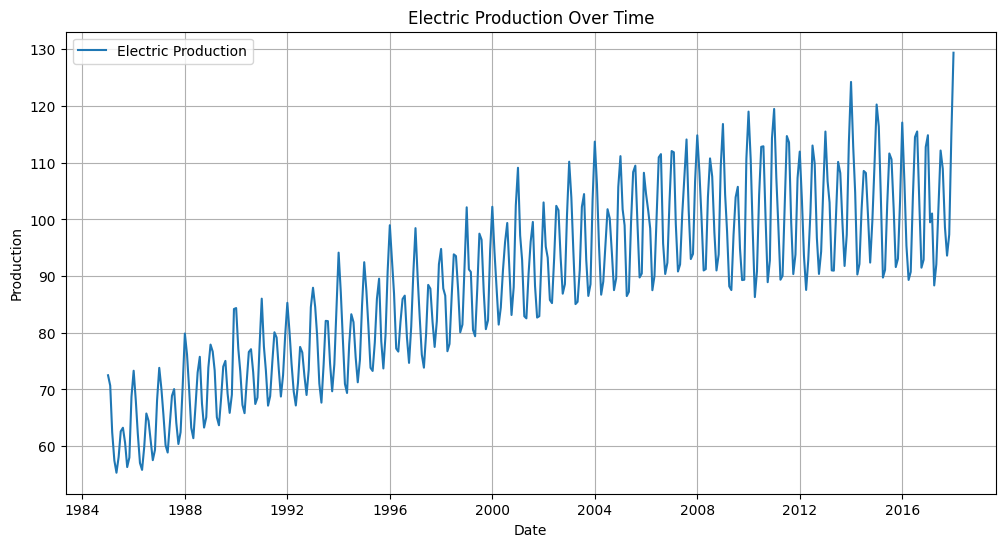

ADF Statistic: -2.2569903500472406
p-value: 0.18621469116586908
Critical Values: {'1%': np.float64(-3.4476305904172904), '5%': np.float64(-2.869155980820355), '10%': np.float64(-2.570827146203181)}
ADF Statistic: -7.104890882267309
p-value: 4.0777865655394705e-10
Critical Values: {'1%': np.float64(-3.4476305904172904), '5%': np.float64(-2.869155980820355), '10%': np.float64(-2.570827146203181)}


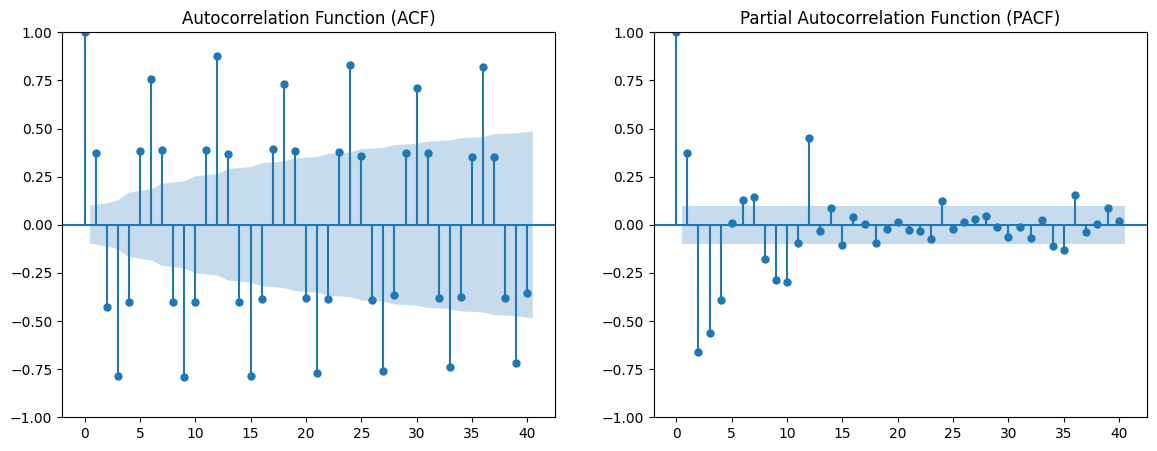

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1308.795
Date:                Wed, 26 Mar 2025   AIC                           2623.589
Time:                        07:39:06   BIC                           2635.533
Sample:                    01-01-1985   HQIC                          2628.321
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0732      0.091      0.805      0.421      -0.105       0.251
ma.L1          0.5450      0.070      7.737      0.000       0.407       0.683
sigma2        43.4248      3.296     13.175      0.0

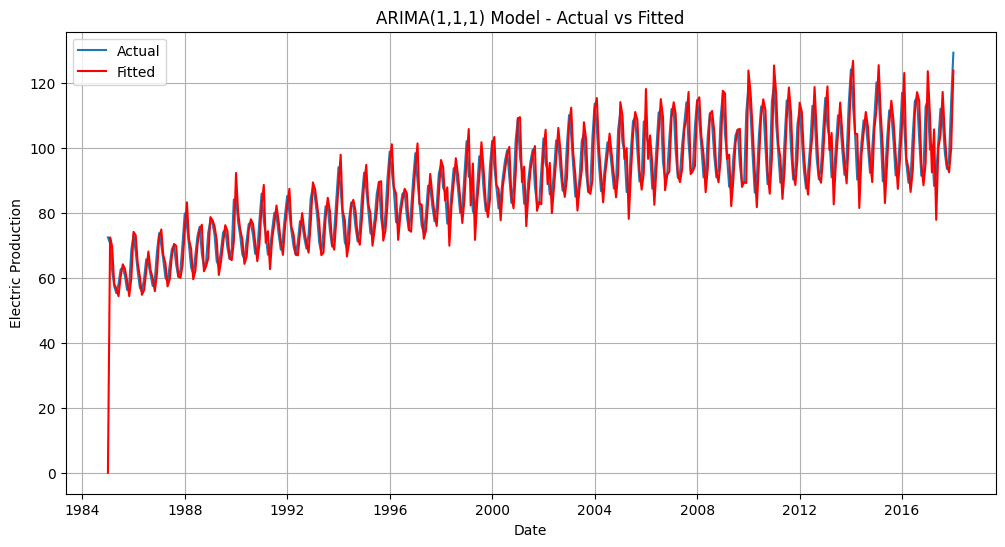

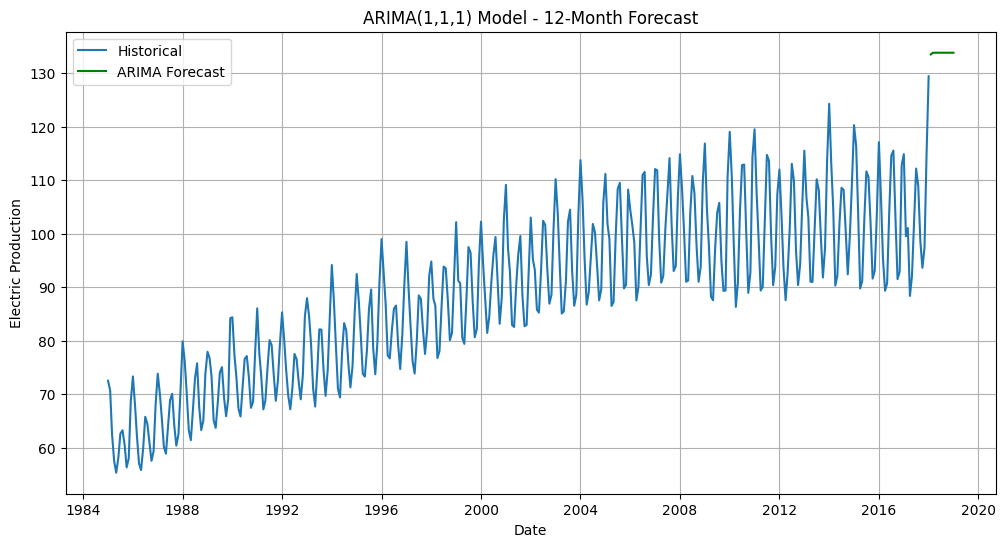

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         IPG2211A2N   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -888.613
Date:                            Wed, 26 Mar 2025   AIC                           1787.226
Time:                                    07:39:07   BIC                           1806.979
Sample:                                01-01-1985   HQIC                          1795.061
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5249      0.045     11.764      0.000       0.437       0.612
ma.L1         -0.9547      0.018   

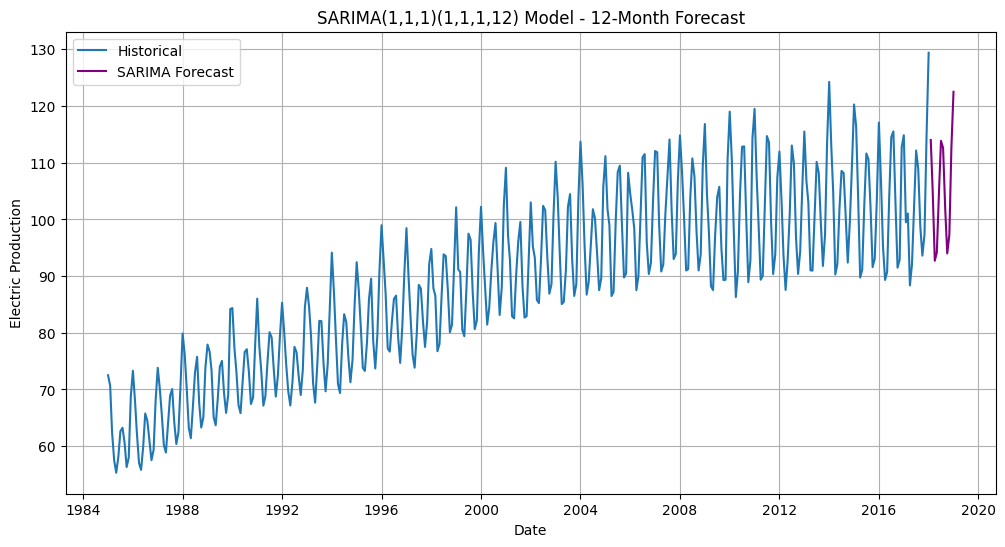

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


file_path = '/content/Electric_Production.csv'
data = pd.read_csv(file_path)

data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)


plt.figure(figsize=(12, 6))
plt.plot(data, label='Electric Production')
plt.title('Electric Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

adf_test(data['IPG2211A2N'])

data_diff = data.diff().dropna()
adf_test(data_diff['IPG2211A2N'])


fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(data_diff, ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(data_diff, ax=axes[1], lags=40)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.show()


model = ARIMA(data, order=(1, 1, 1))
arima_result = model.fit()
print(arima_result.summary())


plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual')
plt.plot(data.index, arima_result.fittedvalues, color='red', label='Fitted')
plt.title('ARIMA(1,1,1) Model - Actual vs Fitted')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()


forecast = arima_result.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical')
plt.plot(pd.date_range(data.index[-1], periods=13, freq='MS')[1:], forecast, color='green', label='ARIMA Forecast')
plt.title('ARIMA(1,1,1) Model - 12-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()


sarima_model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

sarima_forecast = sarima_result.forecast(steps=12)

plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical')
plt.plot(pd.date_range(data.index[-1], periods=13, freq='MS')[1:], sarima_forecast, color='purple', label='SARIMA Forecast')
plt.title('SARIMA(1,1,1)(1,1,1,12) Model - 12-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.show()